Another useful part of the `scikit-learn` interface that we haven't talked about yet is the ability of classifiers to provide uncertainty estimates of predictions. This is often a useful thing in a real-world setting, and is something that is not provided by all classifiers. This is often done using the `decision_function` or `predict_proba` methods. Most (but not all) classifiers have at least one of these methods, and they all work in slightly different ways.

Let's take a look at how these work, and how they can be useful.

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [3]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)
# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

## The Decision Function

In the binary classification case, the return value of `decision_function` is of shape `(n_samples,)` and it returns the value of the decision function for each sample.

In [4]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


This value encodes how strongly the model believes a data point to belong to the positive class 1 in the case of a binary classifier. Positive values indicate a preference for the positive class, and negative values indicate a preference for the negative class.

In [5]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [6]:
print("Thresholded decision function:\n{}".format(
gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


For binary classification, the negative class is always the first entry of the `classes_attribute`, and the positive class is the second entry of `classes_`.

In [7]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(
np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


The range of the `decision_function` can be arbitrary, and it depends on the model. It can be a probability, a distance, a confidence score, etc.

In [8]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


In the following example we plot the `decision_function` for all points in the 2D
plane using a color coding, next to a visualization of the decision boundary, as we saw
earlier. We show training points as circles and test data as triangles 

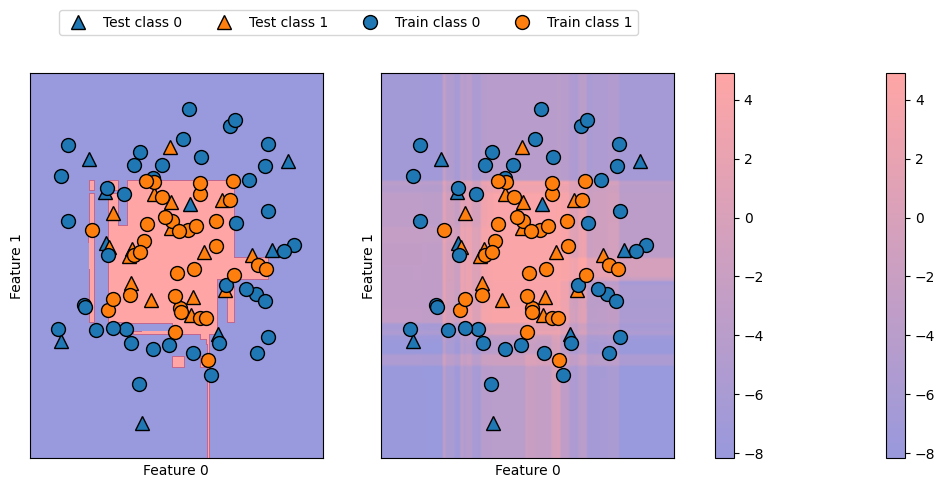

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
    markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
    "Train class 1"], ncol=4, loc=(.1, 1.1))

Encoding not only the predicted outcome but also how certain the classifier is about the prediction can be useful in some applications. However, in this visualization, it is hard to make out the boundary between the two classes.

## Predicting Probabilities

The output of `predict_proba` is a probability for each class, and is often more easily understood. It is always of shape (n_samples,2) for binary classification:

In [12]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


The first entry in each row is the estimated probability of the first class, and the second entry is the estimated probability of the second class. Because it is a probability, the output of `predict_proba` is always between 0 and 1, and the sum of the entries for both classes is always 1:

In [13]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


Because the probabilities for the two classes sum to 1, exactly one of the classes will be above 50% certainty. That class is the one that is predicted.

The boundaries in this plot are much more well-defined, and the small areas of uncertainty are clearly visible.

The `scikit-learn` website has a great comparison of many models and what their uncertainty estimates look like.

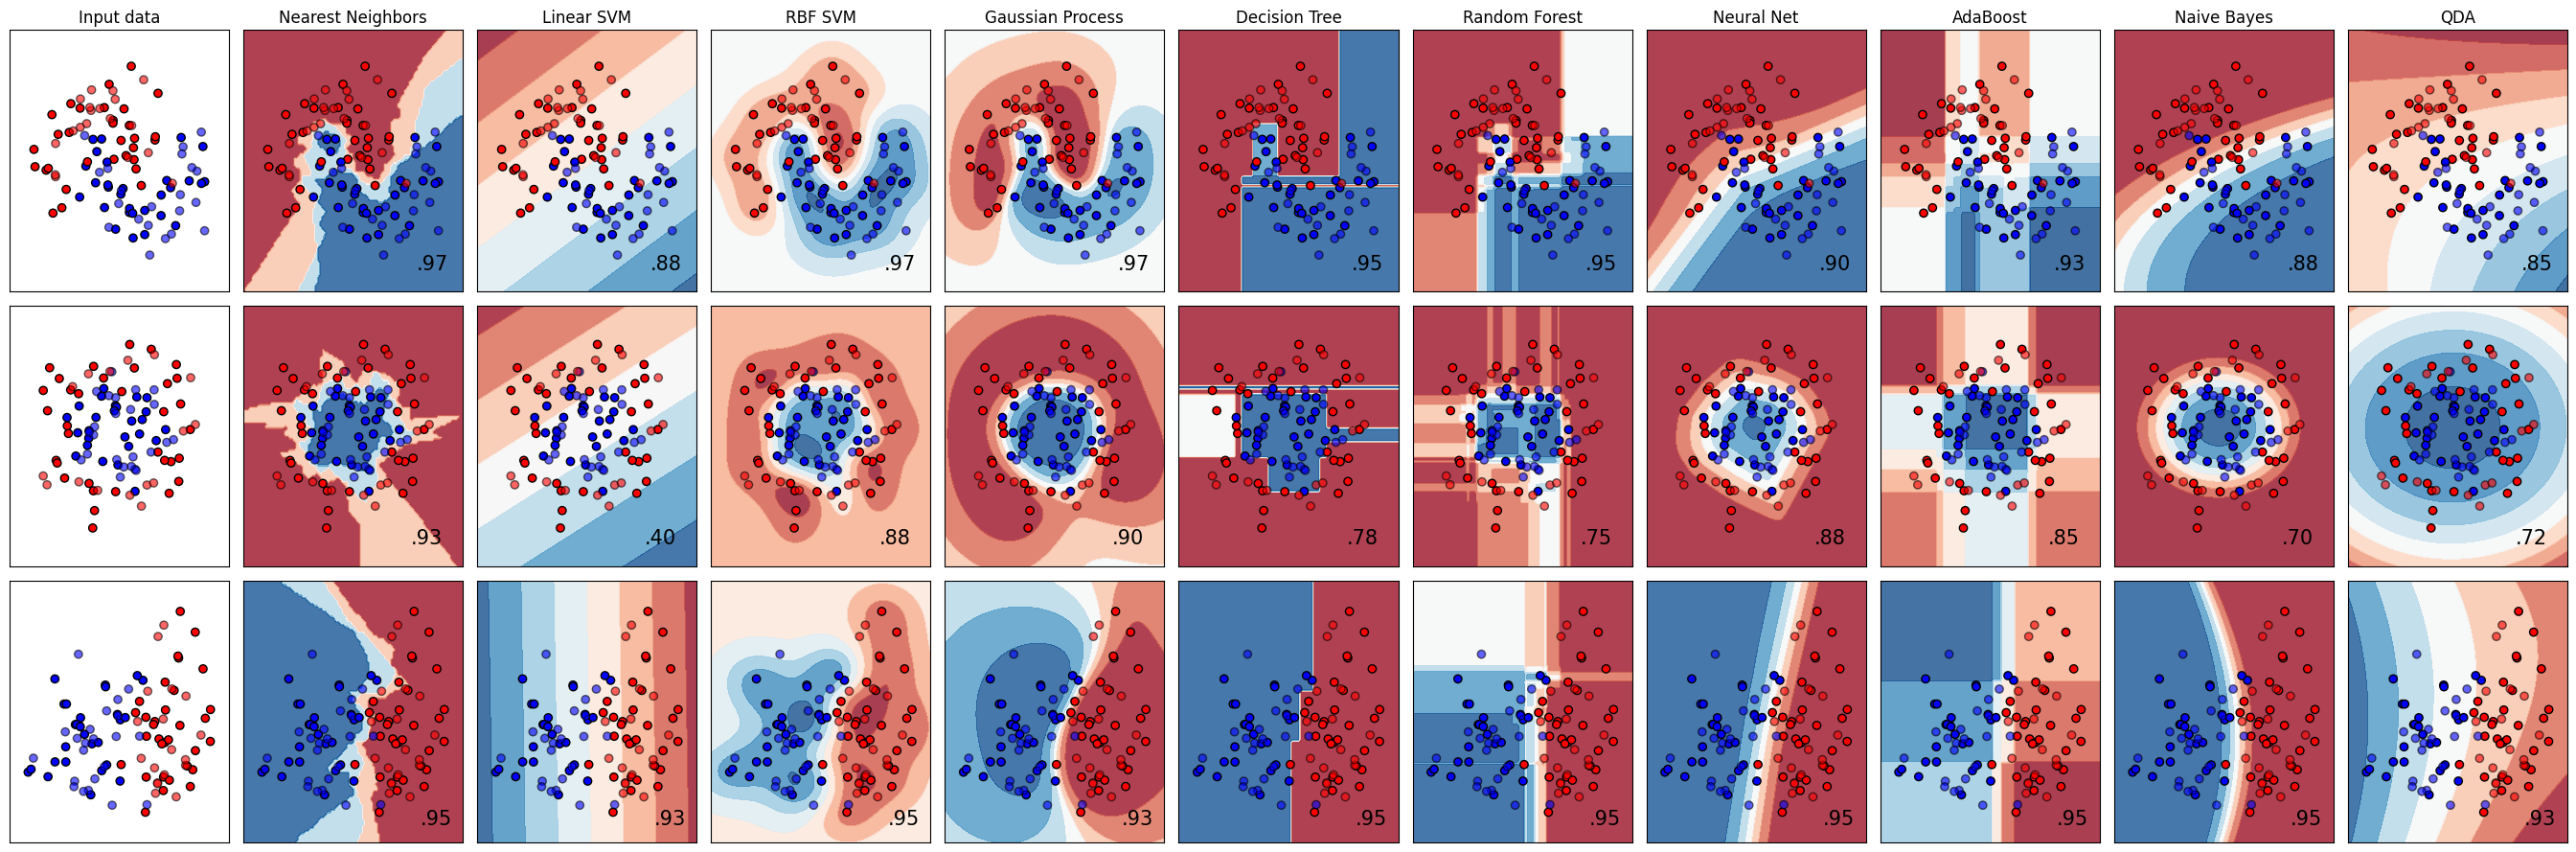

In [15]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

## Uncertainty in Multiclass Classification

For this example, we will use the Iris dataset, which is a simple dataset with 3 classes. We will use a GradientBoostingClassifier to illustrate the `decision_function` and `predict_proba` methods.

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [17]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.89604809  1.14724958 -0.82754003]
 [ 1.16113086 -0.80789044 -0.82827067]
 [-0.89091511 -0.77671169  1.19653416]
 [-0.89604809  1.14724958 -0.82754003]
 [-0.89763468  0.96497584 -0.10374792]
 [ 1.16113086 -0.80789044 -0.82827067]]


In the multiclass case, the decision_function has the shape (n_samples, n_classes) and each column provides a “certainty score” for each class, where a large score means that a class is more likely and a small score means the class is less likely. You can recover the predictions from these scores by finding the maximum entry for each data point:

In [18]:
print("Argmax of decision function:\n{}".format(
np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


The output of `predict_proba` is of shape (n_samples, n_classes) and provides the probability that each class is the right one. As with `decision_function`, the probabilities for each sample sum to 1:

In [19]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


We can again recover of the predictions by computing the argmax of `predict_proba`.

In [20]:
print("Argmax of predicted probabilities:\n{}".format(
np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


You can recover the prediction when there are n_classes many columns by computing the argmax across columns. Be careful, though, if your classes are strings, or you use integers but they are not consecutive and starting from 0. If you want to compare results obtained with predict to results obtained via `decision_function` or pre `dict_proba`, make sure to use the classes_ attribute of the classifier to get the actual class names:

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


# Summary and Outlook

This chapter contains a lot of information about the algorithms, and it is not necessary for you to remember all of these details for the following chapters. However, some knowledge of the models described here—and which to use in a specific situation—is important for successfully applying machine learning in practice. Here is a quick summary of when to use each model:

- *Nearest neighbors*: For small datasets, good as a baseline, easy to explain.

- *Linear models*: Go-to as a first algorithm to try, good for very large datasets, good for very high-dimensional data.

- *Naive Bayes*: Only for classification. Even faster than linear models, good for very large datasets and high-dimensional data. Often less accurate than linear models.

- *Decision trees*: Very fast, don’t need scaling of the data, can be visualized and easily explained.

- *Random forests*: Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data.

- *Gradient boosted decision trees*: Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.

- *Support vector machines*: Powerful for medium-sized datasets of features with similar meaning. Require scaling of data, sensitive to parameters.

- *Neural networks*: Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and to the choice of parameters. Large models need a long time to train.


When working with a new dataset, it is in general a good idea to start with a simple model, such as a linear model or a naive Bayes or nearest neighbors classifier, and see how far you can get. After understanding more about the data, you can consider moving to an algorithm that can build more complex models, such as random forests, gradient boosted decision trees, SVMs, or neural networks.